<h1><center>POS tagging using modified Viterbi Assignment</center></h1>

<div style="text-align: right"> Submitted By:
<br>Ravi Dhir</div>

## Contents

* [1. Problem Statement](#1)
* [2. Data Prepration](#2)
 * [2.1 Import Required Libraries](#2.1)
 * [2.2 Reading and Storing Data](#2.2)
* [3.Build the vanilla Viterbi based POS tagger](#3)
 * [3.1 Creating Hidden Markov Model generate probabilities](#3.1)
      * [3.1.1 Calculating Emission Probabilities](#3.1.1)
      * [3.1.2  Calculating Transition Probablities](#3.1.2)
      * [3.1.3 Creating a Transmission Matrix for Tags ](#3.1.3)
 * [ 3.2 Implementing Viterbi Algorithm (Vanilla)](#3.2) 
      * [3.2.1 Defining Viterbi (Vanilla) Function](#3.2.1)
      * [3.2.2 Computing performnce on Validation Set](#3.2.2)
      * [3.2.3 Analysing Incorrect Tags from Validation Set](#3.2.3)
      * [3.2.4 Computing Performcance againt the Test dataset](#3.2.4)
* [4. Solve the problem of unknown words](#4)
 * [ Modified Viterbi Algorithm - Approach 01](#4.1)
      * [4.1.1 Defining Viterbi (Modified) Function](#4.1.1)
      * [4.1.2 Computing performnce on Validation Set](#4.1.2)
      * [4.1.3 Analysing Incorrect Tags from Validation Set](#4.1.3)
      * [4.1.4 Computing Performance againt the Test dataset.](#4.1.4)
      * [4.1.5 Compare the tagging accuracies of the modifications with the vanilla Viterbi algorithm](#4.1.5)
      * [4.1.6 List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications](#4.1.6)
 * [Rule Based Tagger - Approach 02](#4.2)
      * [4.2.1 Create Rules for Regular Expresions](#4.2.1)
      * [4.2.2 Defining Viterbi (Modified) Function](#4.2.2)
      * [4.2.3 Computing performnce on Validation Set](#4.2.3)
      * [4.2.4 Analysing Incorrect Tags from Validation Set](#4.2.4)
      * [4.2.5 Computing Performance againt the Test dataset.](#4.2.5)
      * [4.2.6 Compare the tagging accuracies of the modifications with the vanilla Viterbi algorithm](#4.2.6)
      * [4.2.7 List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications](#4.2.7)
* [5. Summary](#5)

<a id="1"></a>
## 1. Problem Statement

In this assignment, we need to modify the Viterbi algorithm to solve the problem of unknown words using at __least two techniques__. Though there could be multiple ways to solve this problem, you may use the following hints:

* Which tag class do you think most unknown words belong to? Can you identify rules (e.g. based on morphological cues) that can be used to tag unknown words? You may define separate python functions to exploit these rules so that they work in tandem with the original Viterbi algorithm.
* Why does the Viterbi algorithm choose a random tag on encountering an unknown word? Can you modify the Viterbi algorithm so that it considers only one of the transition or emission probabilities for unknown words?

<a id="2"></a>
## 2. Data Preparation

<a id="2.1"></a>
### 2.1 Import Required Libraries

Let's start by importing the required libraries.

In [1]:
#Importing libraries
import nltk
import re, pprint
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.tag import RegexpTagger 
from nltk.corpus import treebank 

<a id="2.2"></a>
### 2.2 Reading and Storing Data

Reading the NLTK corpus and storing the data into a variable:

In [2]:
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

Let's have a look at few sample sentences in the corpus

In [3]:
# first few tagged sentences
print(nltk_data[:40])

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')], [('Rudolph', 'NOUN'), ('Agnew', 'NOUN'), (',', '.'), ('55', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), ('and', 'CONJ'), ('former', 'ADJ'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Consolidated', 'NOUN'), ('Gold', 'NOUN'), ('Fields', 'NOUN'), ('PLC', 'NOUN'), (',', '.'), ('was', 'VERB'), ('named', 'VERB'), ('*-1', 'X'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('British', 'ADJ'), ('industrial', 'ADJ'), ('

Let's store the Test data, which we will need to validate the Model and store in a variable `test_sentences`

In [4]:
with open('Test_sentences.txt', 'r') as file:
    test_sentences = file.read()

Now, let's split nltk_data into train and test test.

In [5]:
# Splitting into train and test
random.seed(1234)
train_set, test_set = train_test_split(nltk_data,test_size=0.05)

print(len(train_set))
print(len(test_set))
print(train_set[:40])

3718
196
[[('``', '.'), ('She', 'PRON'), ('said', 'VERB'), ('something', 'NOUN'), ('like', 'ADP'), ('`', '.'), ('You', 'PRON'), ('just', 'ADV'), ('want', 'VERB'), ('*-1', 'X'), ('to', 'PRT'), ('make', 'VERB'), ('it', 'PRON'), ('easy', 'ADJ'), ('for', 'ADP'), ('the', 'DET'), ('school', 'NOUN'), ('.', '.'), ("'", '.')], [('The', 'DET'), ('U.S.', 'NOUN'), ('Chamber', 'NOUN'), ('of', 'ADP'), ('Commerce', 'NOUN'), (',', '.'), ('*-1', 'X'), ('still', 'ADV'), ('opposed', 'VERB'), ('to', 'PRT'), ('any', 'DET'), ('mininum-wage', 'NOUN'), ('increase', 'NOUN'), (',', '.'), ('said', 'VERB'), ('0', 'X'), ('the', 'DET'), ('compromise', 'NOUN'), ('plan', 'NOUN'), ('*', 'X'), ('to', 'PRT'), ('lift', 'VERB'), ('the', 'DET'), ('wage', 'NOUN'), ('floor', 'NOUN'), ('27', 'NUM'), ('%', 'NOUN'), ('in', 'ADP'), ('two', 'NUM'), ('stages', 'NOUN'), ('between', 'ADP'), ('April', 'NOUN'), ('1990', 'NUM'), ('and', 'CONJ'), ('April', 'NOUN'), ('1991', 'NUM'), ('``', '.'), ('will', 'VERB'), ('be', 'VERB'), ('imposs

>**Note:** We will keep 95% as training set and 5% as test set, otherwise the model will take a lot of time to compile.

In [6]:
# Getting list of tagged words
train_tagged_words = [tup for sent in train_set for tup in sent]
print("Total Tagged words available are:",len(train_tagged_words))

Total Tagged words available are: 95779


In [7]:
# Generate Sample Tokens 
tokens = [pair[0] for pair in train_tagged_words]
tokens[:10]

['``', 'She', 'said', 'something', 'like', '`', 'You', 'just', 'want', '*-1']

Now, let's create a list of vocabulary that contains all the tokens avaiablle in the corpus

In [8]:
# vocabulary
V = set(tokens)
print(len(V))

12065


In [9]:
vocab = list(V)

In [10]:
# Looking at the number of Tags available
T = set([pair[1] for pair in train_tagged_words])
print("Total Number of Tags available are: ",len(T))

Total Number of Tags available are:  12


In [11]:
print("Tags are:")
print(T)

Tags are:
{'CONJ', 'X', 'NOUN', 'PRT', 'ADV', 'ADJ', 'VERB', '.', 'ADP', 'NUM', 'DET', 'PRON'}


>*Note*: We see that there are total of 12 tags

<a id="3"></a>
## 3.Build the vanilla Viterbi based POS tagger

In This Section, we will build the Simple, Vanilla Viterbi POS Tagger and will compute its performance against test Data

Now let's use HMM algorithm to tag the words.

<a id="3.1"></a>
### 3.1 Creating Hidden Markov Model generate probabilities


<a id="3.1.1"></a>
#### 3.1.1 Calculating Emission Probabilities

In [12]:
# computing P(w/t) and storing in T x V matrix
t = len(T)
v = len(V)
w_given_t = np.zeros((t, v))

In [13]:
# compute word given tag: Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

In [14]:
# examples for word_given_tag

# exclusive
print("\n", "exclusive")
print(word_given_tag('exclusive', 'ADJ'))
print(word_given_tag('exclusive', 'VERB'))
print(word_given_tag('exclusive', 'NOUN'), "\n")

# will
print("\n", "will")
print(word_given_tag('will', 'CONJ'))
print(word_given_tag('will', 'NOUN'))
print(word_given_tag('will', 'VERB'))

# book
print("\n", "book")
print(word_given_tag('book', 'NOUN'))
print(word_given_tag('book', 'VERB'))


 exclusive
(4, 6102)
(0, 12920)
(0, 27452) 


 will
(0, 2154)
(1, 27452)
(267, 12920)

 book
(7, 27452)
(1, 12920)


<a id="3.1.2"></a>
#### 3.1.2  Calculating Transition Probablities

In [15]:
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability

def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [16]:
# examples for t2_given_t1
print(t2_given_t1(t2='VERB', t1='PRT'))
print(t2_given_t1('ADV', 'NOUN'))
print(t2_given_t1('NOUN', 'DET'))
print(t2_given_t1('ADV', 'ADJ'))
print(t2_given_t1('DET', 'NOUN'))
print(t2_given_t1('ADJ', 'NOUN'))

(1240, 3071)
(469, 27452)
(5293, 8297)
(29, 6102)
(372, 27452)
(331, 27452)


In [17]:
#Please note P(tag|start) is same as P(tag|'.')
print(t2_given_t1('NOUN', '.'))
print(t2_given_t1('VERB', '.'))
print(t2_given_t1('DET', '.'))
print(t2_given_t1('ADJ', '.'))

(2474, 11146)
(990, 11146)
(1929, 11146)
(492, 11146)


<a id="3.1.3"></a>
#### 3.1.3 Creating a Transmission Matrix for Tags 

Now Let's create a t*t transition matrix for Tags

In [18]:
# creating t x t transition matrix of tags
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)

tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [19]:
tags_matrix

array([[4.64252545e-04, 8.35654605e-03, 3.50046426e-01, 5.10677788e-03,
        5.57103083e-02, 1.17920145e-01, 1.57381609e-01, 3.57474461e-02,
        5.24605401e-02, 3.94614674e-02, 1.18384399e-01, 5.89600727e-02],
       [1.06586069e-02, 7.31784925e-02, 6.25198856e-02, 1.85968816e-01,
        2.56124716e-02, 1.74992047e-02, 2.05058858e-01, 1.63219854e-01,
        1.44129813e-01, 2.86350609e-03, 5.42475358e-02, 5.50429523e-02],
       [4.22555730e-02, 2.89232116e-02, 2.64352322e-01, 4.40769345e-02,
        1.70843657e-02, 1.20574096e-02, 1.46910965e-01, 2.39326820e-01,
        1.76999852e-01, 9.61678568e-03, 1.35509251e-02, 4.84482013e-03],
       [2.27938779e-03, 1.36763267e-02, 2.45522633e-01, 1.95376109e-03,
        9.44317784e-03, 8.46629739e-02, 4.03777272e-01, 4.23314869e-02,
        2.08401177e-02, 5.66590689e-02, 1.01269946e-01, 1.75838489e-02],
       [7.32113142e-03, 2.36272886e-02, 3.16139758e-02, 1.29783694e-02,
        7.92013332e-02, 1.27121463e-01, 3.46089840e-01, 1.37

In [20]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))
tags_df

,CONJ,X,NOUN,PRT,ADV,ADJ,VERB,.,ADP,NUM,DET,PRON
CONJ,0.000464,0.008357,0.350046,0.005107,0.055710,0.117920,0.157382,0.035747,0.052461,0.039461,0.118384,0.058960
X,0.010659,0.073178,0.062520,0.185969,0.025612,0.017499,0.205059,0.163220,0.144130,0.002864,0.054248,0.055043
NOUN,0.042256,0.028923,0.264352,0.044077,0.017084,0.012057,0.146911,0.239327,0.177000,0.009617,0.013551,0.004845
PRT,0.002279,0.013676,0.245523,0.001954,0.009443,0.084663,0.403777,0.042331,0.020840,0.056659,0.101270,0.017584
ADV,0.007321,0.023627,0.031614,0.012978,0.079201,0.127121,0.346090,0.137438,0.120466,0.032280,0.066556,0.015308
ADJ,0.016224,0.020649,0.699771,0.010980,0.004753,0.066372,0.012127,0.064077,0.078171,0.021141,0.005080,0.000656
VERB,0.005573,0.218111,0.109675,0.031269,0.081579,0.065557,0.168266,0.035681,0.090325,0.023375,0.135526,0.035062
.,0.058676,0.027005,0.221963,0.002333,0.052395,0.044141,0.088821,0.094653,0.089539,0.080477,0.173067,0.066840
ADP,0.000642,0.034866,0.321818,0.001497,0.013155,0.107487,0.008021,0.039679,0.015936,0.063102,0.323850,0.069947
NUM,0.014218,0.208235,0.355154,0.026955,0.002666,0.033768,0.018365,0.117891,0.035545,0.182761,0.002666,0.001777


In [21]:
tags_df.loc['.', :]

CONJ    0.058676
X       0.027005
NOUN    0.221963
PRT     0.002333
ADV     0.052395
ADJ     0.044141
VERB    0.088821
.       0.094653
ADP     0.089539
NUM     0.080477
DET     0.173067
PRON    0.066840
Name: ., dtype: float32

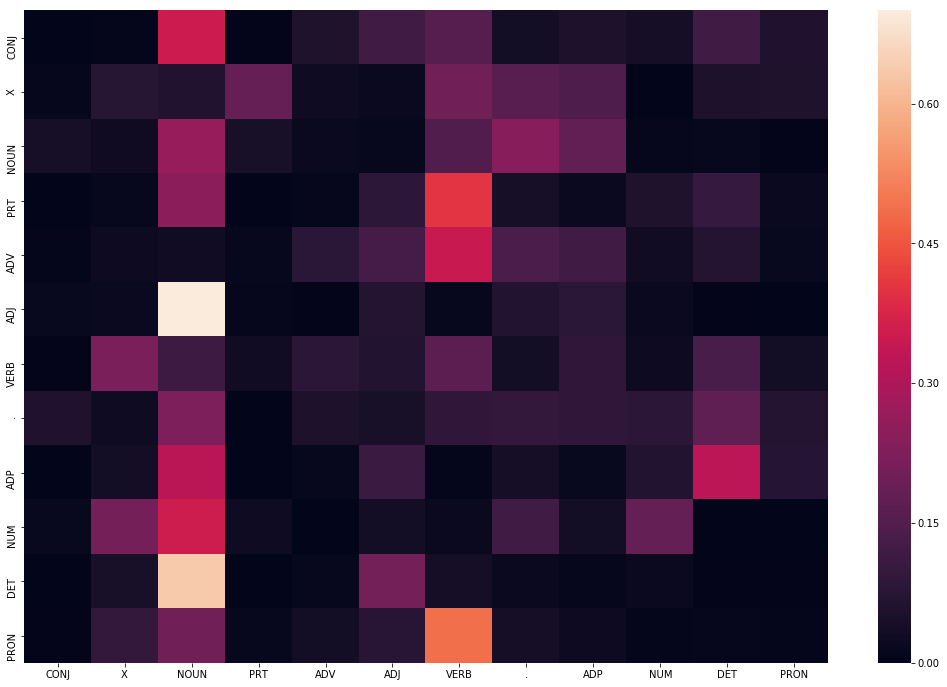

In [22]:
# heatmap of tags matrix
# T(i, j) means P(tag j given tag i)
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

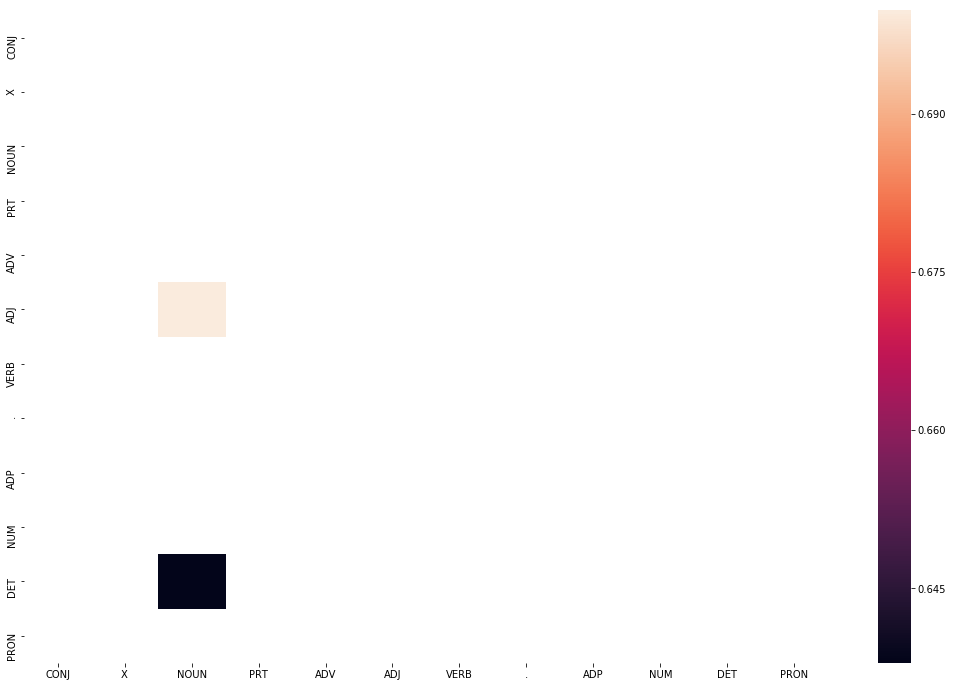

In [23]:
# frequent tags
# filter the df to get P(t2, t1) > 0.5
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent)
plt.show()

<a id="3.2"></a>
### 3.2 Implementing Viterbi Algorithm (Vanilla)

In this section, we will implment the Viterbi Algorithm on AS-IS basic and will notice it's performance on the Validation set and and test Set.


In [24]:
print("Total tagged words are: ",len(train_tagged_words))

Total tagged words are:  95779


<a id="3.2.1"></a>
#### 3.2.1 Defining Viterbi (Vanilla) Function

In [25]:
# Viterbi Heuristic
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p   
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

<a id="3.2.2"></a>
#### 3.2.2 Computing performnce on Validation Set

In [26]:
test_run = test_set

# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]

#test_run = test_set

# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]

# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]

In [27]:
# tagging the test sentences - vanilla
start = time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start

In [28]:
print("Time taken in seconds: ", difference)
print(tagged_seq)
#print(test_run_base)

Time taken in seconds:  1009.4039361476898
[('Champagne', 'NOUN'), ('and', 'CONJ'), ('dessert', 'CONJ'), ('followed', 'VERB'), ('.', '.'), ('The', 'DET'), ('company', 'NOUN'), ('recently', 'ADV'), ('said', 'VERB'), ('0', 'X'), ('it', 'PRON'), ('would', 'VERB'), ('sell', 'VERB'), ('some', 'DET'), ('operations', 'NOUN'), ('and', 'CONJ'), ('lay', 'CONJ'), ('off', 'ADV'), ('4', 'NUM'), ('%', 'NOUN'), ('of', 'ADP'), ('its', 'PRON'), ('work', 'VERB'), ('force', 'VERB'), (',', '.'), ('altogether', 'CONJ'), ('*-1', 'X'), ('reducing', 'VERB'), ('employment', 'NOUN'), ('to', 'PRT'), ('less', 'ADJ'), ('than', 'ADP'), ('16,000', 'NUM'), ('from', 'ADP'), ('about', 'ADP'), ('18,000', 'NUM'), ('.', '.'), ('Much', 'ADV'), ('of', 'ADP'), ('Mr.', 'NOUN'), ('Lane', 'NOUN'), ("'s", 'PRT'), ('film', 'NOUN'), ('takes', 'VERB'), ('a', 'DET'), ('highly', 'ADV'), ('romanticized', 'CONJ'), ('view', 'NOUN'), ('of', 'ADP'), ('life', 'NOUN'), ('on', 'ADP'), ('the', 'DET'), ('streets', 'NOUN'), ('-LRB-', '.'), ('th

**Checking Accuracy aganst Validation Set**

In [29]:
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 

In [30]:
accuracy = len(check)/len(tagged_seq)

In [31]:
accuracy

0.9023892178885031

>**Note:** We see that vanilla Viterbi Algorithm runs at an accuracy of **90.23%**

<a id="3.2.3"></a>
#### 3.2.3  Analysing Incorrect Tags from Validation Set

Now, let's see the Tags that were missed by the Vanilla Viterbi Algorithm:

In [32]:
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0]!=j[1]]

In [33]:
incorrect_tagged_cases

[[('and', 'CONJ'), (('dessert', 'CONJ'), ('dessert', 'NOUN'))],
 [('and', 'CONJ'), (('lay', 'CONJ'), ('lay', 'VERB'))],
 [('lay', 'VERB'), (('off', 'ADV'), ('off', 'PRT'))],
 [('its', 'PRON'), (('work', 'VERB'), ('work', 'NOUN'))],
 [('work', 'NOUN'), (('force', 'VERB'), ('force', 'NOUN'))],
 [(',', '.'), (('altogether', 'CONJ'), ('altogether', 'ADV'))],
 [('to', 'PRT'), (('less', 'ADJ'), ('less', 'ADV'))],
 [('highly', 'ADV'), (('romanticized', 'CONJ'), ('romanticized', 'VERB'))],
 [('no', 'DET'), (('more', 'ADJ'), ('more', 'ADV'))],
 [('more', 'ADV'), (('romanticized', 'CONJ'), ('romanticized', 'VERB'))],
 [('the', 'DET'), (('good-hearted', 'CONJ'), ('good-hearted', 'ADJ'))],
 [('$', '.'), (('2.15', 'CONJ'), ('2.15', 'NUM'))],
 [(',', '.'), (('acquisition-minded', 'CONJ'), ('acquisition-minded', 'ADJ'))],
 [('London-based', 'ADJ'), (('jeweler', 'CONJ'), ('jeweler', 'NOUN'))],
 [('for', 'ADP'), (('Seattle-based', 'CONJ'), ('Seattle-based', 'ADJ'))],
 [('specialty', 'NOUN'), (('jeweler

<a id="3.2.4"></a>
#### 3.2.4 Computing Performcance againt the Test dataset.

In [34]:
## Testing

test_sentences
sentence_test = 'Twitter is the best networking social site. Man is a social animal. Data science is an emerging field. Data science jobs are high in demand.'
words = word_tokenize(test_sentences)

start = time.time()
tagged_seq = Viterbi(words)
end = time.time()
difference = end-start

In [35]:
print(tagged_seq)
print(difference)

[('Android', 'CONJ'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google', 'CONJ'), ('.', '.'), ('Android', 'CONJ'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'CONJ'), ('worldwide', 'CONJ'), ('on', 'ADP'), ('smartphones', 'CONJ'), ('since', 'ADP'), ('2011', 'CONJ'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'CONJ'), ('.', '.'), ('Google', 'CONJ'), ('and', 'CONJ'), ('Twitter', 'CONJ'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'CONJ'), ('that', 'DET'), ('gave', 'VERB'), ('Google', 'CONJ'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'CONJ'), ("'s", 'PRT'), ('firehose', 'CONJ'), ('.', '.'), ('Twitter', 'CONJ'), ('is', 'VERB'), ('an', 'DET'), ('online', 'CONJ'), ('news', 'NOUN'), ('and', 'CONJ'), ('social', 'ADJ'), ('networking', 'NOUN'), ('service', 'NOUN'), ('on', 'ADP'), ('which', 'DET')

<a id="4"></a>
## 4. Solve the problem of unknown words

In the above Section we noticed that the unknown words (words that were unavalible in the Corpus, were tagges incorrecttly by Vanila Viterbi algorithm. Although the accuraccy was 91%, we still have an area of improvement.
<br>

We shall now use two approaches to solve the problem of unknown words:
* Modified Viterbi Algorithm 
* Rule-Based Tagger

<a id="4.1"></a>
### 4.1 Modified Viterbi Algorithm - Approach 01

In this approach, we will modify the Viterbi Algorithm in such a way that __if the unknown word is unavailable in the Corpus, it will not consider it's Emission Probability to compute the Tag.__

<a id="4.1.1"></a>
#### 4.1.1 Defining Viterbi (Modified) Function

In [36]:
# Viterbi Heuristic
def ViterbiM(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            if word in vocab:
                state_probability = emission_p * transition_p    
                p.append(state_probability)
            else:
                state_probability = transition_p    
                p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

<a id="4.1.2"></a>
#### 4.1.2 Computing performnce on Validation Set

In [37]:
test_run = test_set

# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]

#test_run = test_set

# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]

# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]

In [38]:
# tagging the test sentences - Modified Viterbi
start = time.time()
tagged_seq = ViterbiM(test_tagged_words)
end = time.time()
difference = end-start

In [39]:
print("Time taken in seconds: ", difference)
#print(tagged_seq)
#print(test_run_base)

Time taken in seconds:  1012.6972675323486


**Checking Accuracy aganst Validation Set**

In [40]:
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq)

In [41]:
accuracy

0.9375127629160711

>**Note:** We see that Modified Viterbi Algorithm runs at an accuracy of **93.75%**

<a id="4.1.3"></a>
#### 4.1.3  Analysing Incorrect Tags from Validation Set

In [42]:
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0]!=j[1]]

In [43]:
incorrect_tagged_cases

[[('and', 'CONJ'), (('lay', 'NOUN'), ('lay', 'VERB'))],
 [('its', 'PRON'), (('work', 'VERB'), ('work', 'NOUN'))],
 [('work', 'NOUN'), (('force', 'VERB'), ('force', 'NOUN'))],
 [(',', '.'), (('altogether', 'NOUN'), ('altogether', 'ADV'))],
 [('to', 'PRT'), (('less', 'ADJ'), ('less', 'ADV'))],
 [('no', 'DET'), (('more', 'ADJ'), ('more', 'ADV'))],
 [('more', 'ADV'), (('romanticized', 'NOUN'), ('romanticized', 'VERB'))],
 [('the', 'DET'), (('good-hearted', 'NOUN'), ('good-hearted', 'ADJ'))],
 [('$', '.'), (('2.15', 'NOUN'), ('2.15', 'NUM'))],
 [(',', '.'), (('acquisition-minded', 'NOUN'), ('acquisition-minded', 'ADJ'))],
 [('for', 'ADP'), (('Seattle-based', 'DET'), ('Seattle-based', 'ADJ'))],
 [('$', '.'), (('62.1', 'NOUN'), ('62.1', 'NUM'))],
 [('who', 'PRON'), (('*T*-250', 'VERB'), ('*T*-250', 'X'))],
 [('with', 'ADP'), (('Univest', 'DET'), ('Univest', 'NOUN'))],
 [('$', '.'), (('25.50', 'NOUN'), ('25.50', 'NUM'))],
 [('How', 'ADV'), (("'s", 'PRT'), ("'s", 'VERB'))],
 [('Street', 'NOUN')

<a id="4.1.4"></a>
#### 4.1.4 Computing Performance againt the Test dataset.

In [44]:
## Testing

words = word_tokenize(test_sentences)
start = time.time()
tagged_seq = ViterbiM(words)
end = time.time()
difference = end-start

In [45]:
print(tagged_seq)
print(difference)

[('Android', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google', 'DET'), ('.', '.'), ('Android', 'NOUN'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'NOUN'), ('worldwide', 'NOUN'), ('on', 'ADP'), ('smartphones', 'DET'), ('since', 'ADP'), ('2011', 'DET'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'DET'), ('.', '.'), ('Google', 'NOUN'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'DET'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'X'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'VERB'), ("'s", 'PRT'), ('firehose', 'VERB'), ('.', '.'), ('Twitter', 'NOUN'), ('is', 'VERB'), ('an', 'DET'), ('online', 'NOUN'), ('news', 'NOUN'), ('and', 'CONJ'), ('social', 'ADJ'), ('networking', 'NOUN'), ('service', 'NOUN'), ('on', 'ADP'), ('which', 'DET'), ('user

<a id="4.1.5"></a>
#### 4.1.5 Compare the tagging accuracies of the modifications with the vanilla Viterbi algorithm

We saw that the modified Viterbi Algoritm runs at an Accuracy of **94.3%**  whereas the Vanilla version ran at **90.23**.
Thus, there is an **imporvement of approx 3.5%  accuracy** with the above modifications.

<a id="4.1.6"></a>
#### 4.1.6 List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications

Few Tag's that were incorrecly identified (in the test Set) are:

* ('Android', 'X')
* ('Google', 'X')
* ('Twitter', 'X')
* ('FIFA', 'X')
* ('Cup', 'X')

These Tags were correctly identified as:

* ('Android', 'NOUN')
* ('Google', 'NOUN')
* ('Twitter', 'NOUN')
* ('FIFA', 'NOUN')
* ('Cup', 'NOUN')

<a id="4.2"></a>
### 4.2 Rule Based Tagger - Approach 02

In this Section, we will use a set of Regular Expressions to tag the unknown words. We will then compute the accuracy based on rules.

<a id="4.2.1"></a>
#### 4.2.1 Create Rules for Regular Expresions

Here, we will define the rules, on how the word will be trated.
This will be used to deal with the unknown words.

In [46]:
# specify patterns for tagging
patterns = [
    (r'.*ing$', 'VERB'),              # gerund
    (r'.*ed$', 'VERB'),               # past tense
    (r'.*es$', 'VERB'),               # 3rd singular present
    (r'.*ould$', 'VERB'),              # modals
    (r'.*\'s$', 'NOUN'),              # possessive nouns
    (r'.*s$', 'NOUN'),                # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'NUM'), # cardinal numbers
    (r'.*ful$', 'ADJ'),               # Words ending with ful (Successful) as ADJ
   # ('^\*.*\*$', 'X'),
    ('.*[0-9].*','X'),
    (r'.*', 'NOUN') , 
]

In [47]:
# rule based tagger
rule_based_tagger = nltk.RegexpTagger(patterns)

<a id="4.2.2"></a>
#### 4.2.2 Defining Viterbi (Modified) Function

This function will process the words only if they are contained inside the Training dataset and will skip otherwise.

In [48]:
# Viterbi Heuristic
def ViterbiM2(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        if word in vocab:
                #viterbi
                for tag in T:
                    if key == 0:
                        transition_p = tags_df.loc['.', tag]
                    else:
                        transition_p = tags_df.loc[state[-1], tag]
                
                    # compute emission and state probabilities
                    emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
                    state_probability = emission_p * transition_p    
                    p.append(state_probability)
            
                pmax = max(p)
                # getting state for which probability is maximum
                state_max = T[p.index(pmax)] 
                state.append(state_max)
        else:
            pass
            
    return list(zip(words, state))

Now, Let's create functions which will divide the dataset on basis of known and unknown words.

In [49]:
# Defining a list of known and unknown words.
def KnownWords(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        if word in vocab:
                state.append(word)
        else:
               pass
    return state

In [50]:
def UnKnownWords(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        if word in vocab:
                pass
        else:
               state.append(word)
    return state

<a id="4.2.3"></a>
#### 4.2.3 Computing performnce on Validation Set

In [51]:
test_run = test_set


# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]

# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]

>**Note:** Instead of evaluating sentence wise, we will evaluate word wise and see how many words were tagged properly. Hence, we will flatten out the test_run

In [52]:
flat_list = []
for sublist in test_run:
    for item in sublist:
        flat_list.append(item)
test_tuples = sorted(flat_list)

In [53]:
# Tagging both Known and Unknown words
start = time.time()
#This will tag all the Unknown words - words not in the original Training set, based on the Rules defined above.
rule_seq = rule_based_tagger.tag(UnKnownWords(test_tagged_words))
#This will use  Modified Viterbi algorithm to tag remaining words
viterbi_seq = ViterbiM2(KnownWords(test_tagged_words))
final_seq = viterbi_seq + rule_seq 
end = time.time()
difference = end-start

In [54]:
print("Time taken in seconds: ", difference)
print("Viterbi Sequence Tags:")
print(viterbi_seq)
print("Rule Based Sequence Tags:")
print(rule_seq)
#print(test_run_base)

Time taken in seconds:  942.3325200080872
Viterbi Sequence Tags:
[('Champagne', 'NOUN'), ('and', 'CONJ'), ('followed', 'VERB'), ('.', '.'), ('The', 'DET'), ('company', 'NOUN'), ('recently', 'ADV'), ('said', 'VERB'), ('0', 'X'), ('it', 'PRON'), ('would', 'VERB'), ('sell', 'VERB'), ('some', 'DET'), ('operations', 'NOUN'), ('and', 'CONJ'), ('off', 'ADV'), ('4', 'NUM'), ('%', 'NOUN'), ('of', 'ADP'), ('its', 'PRON'), ('work', 'VERB'), ('force', 'VERB'), (',', '.'), ('*-1', 'X'), ('reducing', 'VERB'), ('employment', 'NOUN'), ('to', 'PRT'), ('less', 'ADJ'), ('than', 'ADP'), ('16,000', 'NUM'), ('from', 'ADP'), ('about', 'ADP'), ('18,000', 'NUM'), ('.', '.'), ('Much', 'ADV'), ('of', 'ADP'), ('Mr.', 'NOUN'), ('Lane', 'NOUN'), ("'s", 'PRT'), ('film', 'NOUN'), ('takes', 'VERB'), ('a', 'DET'), ('highly', 'ADV'), ('view', 'VERB'), ('of', 'ADP'), ('life', 'NOUN'), ('on', 'ADP'), ('the', 'DET'), ('streets', 'NOUN'), ('-LRB-', '.'), ('though', 'ADP'), ('probably', 'ADV'), ('no', 'DET'), ('more', 'ADJ')

In [55]:
final_seq = viterbi_seq + rule_seq 

In [56]:
final_tup = sorted(final_seq)

**Checking Accuracy aganst Validation Set**

In [57]:
# accuracy
check = [i for i, j in zip(final_tup, test_tuples) if i == j] 

In [58]:
accuracy = len(check)/len(final_seq)

In [59]:
accuracy

0.9528282622013478

>**Note:** We see that Modified Viterbi Algorithm runs at an accuracy of **95.30%**

<a id="4.2.4"></a>
#### 4.2.4  Analysing Incorrect Tags from Validation Set

In [60]:
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(final_tup, test_tuples)) if j[0]!=j[1]]

In [61]:
incorrect_tagged_cases

[[('Weisfield', 'NOUN'), (("'s", 'VERB'), ("'s", 'PRT'))],
 [('from', 'ADP'), (('10-lap', 'X'), ('10-lap', 'ADJ'))],
 [('of', 'ADP'), (('1980s', 'NOUN'), ('1980s', 'NUM'))],
 [('and', 'CONJ'), (('500-Stock', 'X'), ('500-Stock', 'NOUN'))],
 [('In', 'ADP'), (('9\\/32', 'X'), ('9\\/32', 'NUM'))],
 [('its', 'PRON'), (('A', 'DET'), ('A', 'NOUN'))],
 [('in', 'ADP'), (('AC-130U', 'X'), ('AC-130U', 'NOUN'))],
 [('mechanical', 'ADJ'), (('Above', 'NOUN'), ('Above', 'ADP'))],
 [('said', 'VERB'), (('American', 'ADJ'), ('American', 'NOUN'))],
 [('0', 'X'), (('American', 'ADJ'), ('American', 'NOUN'))],
 [('its', 'PRON'), (('American', 'ADJ'), ('American', 'NOUN'))],
 [('rights', 'NOUN'), (('Ames', 'VERB'), ('Ames', 'NOUN'))],
 [('company', 'NOUN'), (('Baking', 'VERB'), ('Baking', 'NOUN'))],
 [('.', '.'), (('Bridges', 'VERB'), ('Bridges', 'NOUN'))],
 [('Publishing', 'NOUN'), (('Brisk', 'NOUN'), ('Brisk', 'ADJ'))],
 [('bigger', 'ADJ'), (('Can', 'NOUN'), ('Can', 'VERB'))],
 [('price', 'NOUN'), (('Commo

<a id="4.2.5"></a>
#### 4.2.5 Computing Performance againt the Test dataset.

In [62]:
## Testing

words = word_tokenize(test_sentences)
start = time.time()
rule_seq = rule_based_tagger.tag(UnKnownWords(words))
viterbi_seq = ViterbiM2(KnownWords(words))
final_seq = rule_seq + viterbi_seq
end = time.time()
difference = end-start

In [63]:
print(sorted(final_seq))
print(difference)

[("'s", 'VERB'), (',', '.'), (',', '.'), ('.', '.'), ('.', '.'), ('.', '.'), ('.', '.'), ('.', '.'), ('.', '.'), ('.', '.'), ('.', '.'), ('.', '.'), ('.', '.'), ('11th', 'ADJ'), ('2011', 'NUM'), ('2013', 'NUM'), ('2015', 'NUM'), ('2018', 'NUM'), ('21st', 'X'), ('3', 'NUM'), ('Android', 'NOUN'), ('Android', 'NOUN'), ('Atlanta', 'NOUN'), ('Atlanta', 'NOUN'), ('Before', 'ADP'), ('Cup', 'NOUN'), ('Cup', 'NOUN'), ('Cup', 'NOUN'), ('Dallas', 'NOUN'), ('Denver', 'NOUN'), ('Donald', 'NOUN'), ('Eastern', 'NOUN'), ('Europe', 'NOUN'), ('Europe', 'NOUN'), ('FIFA', 'NOUN'), ('FIFA', 'NOUN'), ('Francisco', 'NOUN'), ('Google', 'NOUN'), ('Google', 'NOUN'), ('Google', 'NOUN'), ('I', 'PRON'), ('ICESAT-2', 'X'), ('NASA', 'NOUN'), ('OS', 'NOUN'), ('Philadelphia', 'NOUN'), ('San', 'NOUN'), ('Satellite', 'NOUN'), ('Show', 'NOUN'), ('Show', 'NOUN'), ('The', 'DET'), ('This', 'DET'), ('Trump', 'NOUN'), ('Twitter', 'NOUN'), ('Twitter', 'NOUN'), ('Twitter', 'NOUN'), ('World', 'NOUN'), ('World', 'NOUN'), ('World'

<a id="4.2.6"></a>
#### 4.2.6 Compare the tagging accuracies of the modifications with the vanilla Viterbi algorithm

We saw that the modified Viterbi Algoritm runs at an Accuracy of **95.3%**  whereas the Vanilla version ran at **90.3%**.
Thus, there is an **imporvement of approx 5%  accuracy** with the above modifications.

<a id="4.2.7"></a>
#### 4.2.7 List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications

Few Tag's that were incorrecly identified (in the test Set) are:

* ('Android', 'X')
* ('Google', 'X')
* ('Twitter', 'X')
* ('FIFA', 'X')
* ('Cup', 'X')

These Tags were correctly identified as:

* ('Android', 'NOUN')
* ('Google', 'NOUN')
* ('Twitter', 'NOUN')
* ('FIFA', 'NOUN')
* ('Cup', 'NOUN')


_Please note that these Tags were identified correctly in both approaches._

<a id="5"></a>
## 5. Summary

In this assignement, we started by using HMM and implemented it usinf the viterbi algorithm for syntactic processing. Initially, on running the Algorithm with defaults (Vanilla), we noticed that the accuracy was above 90%.
We also noticed that, the words which were not in the training set (i.e had no emission probabilities) had scope for improvement.
In order to improve, we took two approaches.
* The first approach, would assign the transition probability as final probablity. (**Increased Accuracy by 3.5%**)
* The Second approach, a rule based approach would use manual rules to treat the unknown words. (**Increased Accuracy by 5%**)

In the end we ran a test set and saw that the words (Like Google) which were identified incorrectly by Vanilla algorithm, were identified correctly using these two approaches.